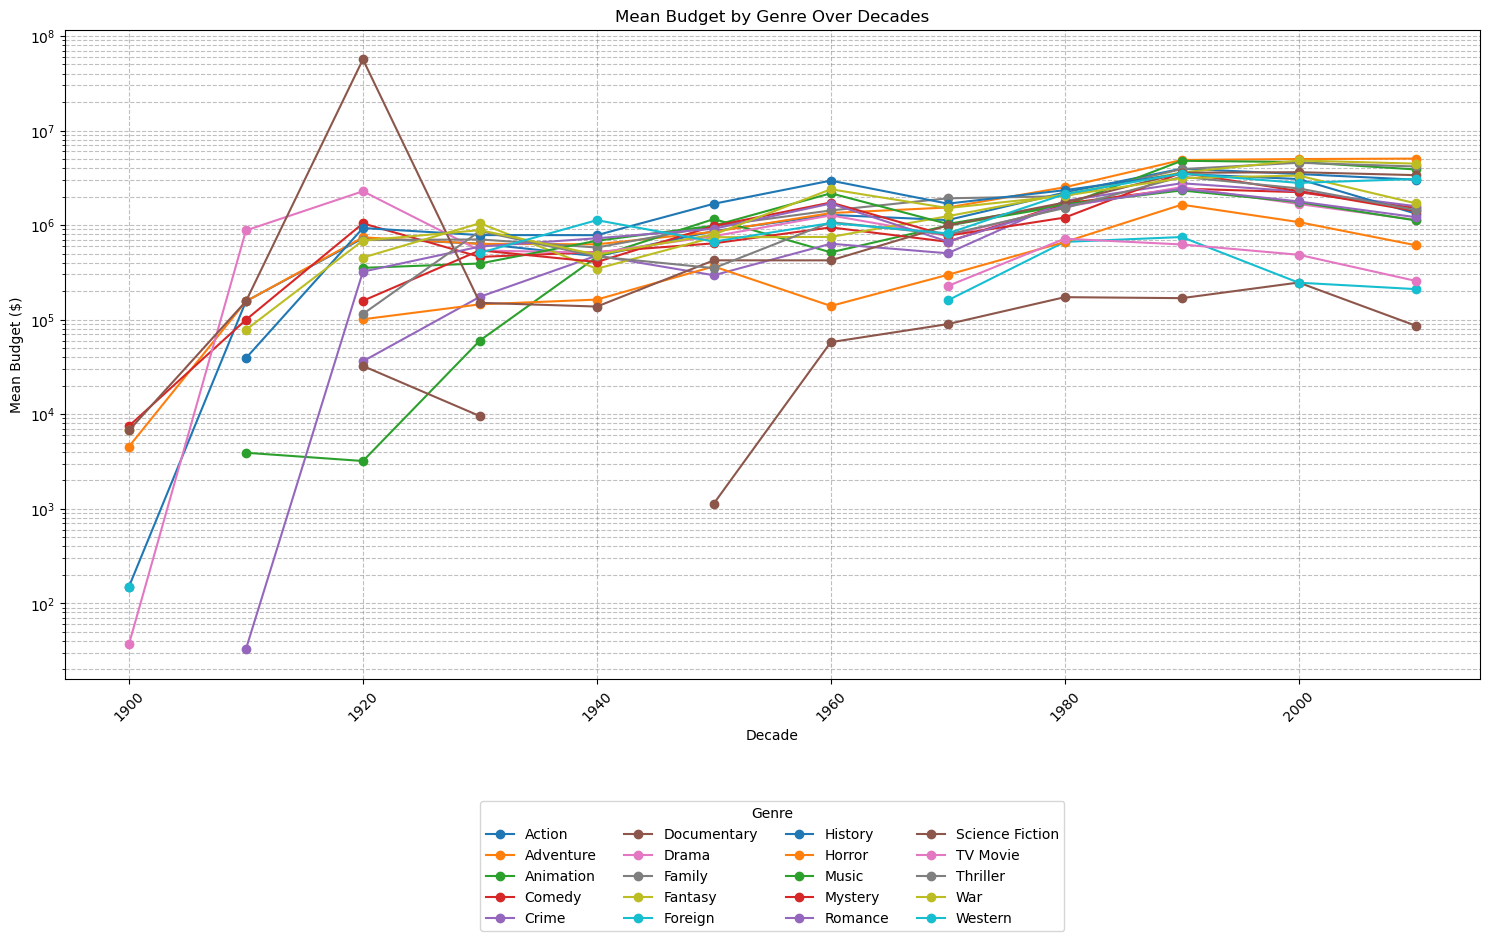

Genres, their mean budgets in 2010, and trend compared to 2000:
Adventure: $76,235,289.28 (Trend: +29.43%)
Fantasy: $67,404,854.53 (Trend: +18.46%)
Family: $62,906,632.17 (Trend: +16.95%)
Animation: $58,502,715.87 (Trend: +6.85%)
Science Fiction: $50,960,186.62 (Trend: +19.16%)
Western: $46,418,000.00 (Trend: +40.84%)
Action: $45,589,428.29 (Trend: +11.47%)
War: $25,651,357.56 (Trend: -34.86%)
Crime: $23,930,177.63 (Trend: -10.68%)
Comedy: $22,931,369.44 (Trend: -12.79%)
Thriller: $21,793,834.57 (Trend: -24.33%)
Mystery: $21,250,931.99 (Trend: -21.36%)
History: $19,988,199.51 (Trend: -44.81%)
Romance: $18,309,286.22 (Trend: -12.78%)
Drama: $17,156,616.62 (Trend: -12.98%)
Music: $16,915,072.77 (Trend: -17.93%)
Horror: $9,246,530.96 (Trend: -27.13%)
TV Movie: $3,880,000.00 (Trend: -32.27%)
Foreign: $3,176,498.70 (Trend: +9.50%)
Documentary: $1,303,495.46 (Trend: -55.24%)


In [62]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['movie_budget']  # Replace with your actual database name
collection = db['kaggle_movies_metadata_optimized_v1']

# Fetch and aggregate data from MongoDB
pipeline = [
    {'$match': {'budget': {'$gt': 0}, 'release_date': {'$ne': None}}},
    {'$unwind': '$genres'},
    {'$group': {
        '_id': {
            'genre': '$genres.name',
            'decade': {'$subtract': [{'$year': '$release_date'}, {'$mod': [{'$year': '$release_date'}, 10]}]}
        },
        'movie_count': {'$sum': 1},
        'total_budget': {'$sum': '$budget'}
    }},
    {'$sort': {'_id.genre': 1,'_id.decade': 1}},
]

cursor = collection.aggregate(pipeline)

# Convert cursor to array
data = list(cursor)

# Calculate mean budget for each genre-decade combination
for item in data:
    item['mean_budget'] = item['total_budget'] / item['movie_count']

# Create a dictionary to store the pivoted data
pivot_data = {}

# Pivot the data for plotting
for item in data:
    decade = item['_id']['decade']
    genre = item['_id']['genre']
    mean_budget = item['mean_budget']
    
    if decade not in pivot_data:
        pivot_data[decade] = {}
    pivot_data[decade][genre] = mean_budget

# Adjust for inflation
for decade in pivot_data:
    inflation_factor = 1.28 ** ((decade - min(pivot_data.keys()))/10)
    for genre in pivot_data[decade]:
        pivot_data[decade][genre] /= inflation_factor

# Get unique decades and genres
decades = sorted(list(pivot_data.keys()))
genres = sorted(list(set(genre for decade_data in pivot_data.values() for genre in decade_data.keys())))

# Create a line plot
plt.figure(figsize=(15, 10))
for genre in genres:
    genre_data = [pivot_data[decade].get(genre, None) for decade in decades]
    plt.plot(decades, genre_data, marker='o', label=genre)

plt.title('Mean Budget by Genre Over Decades')
plt.xlabel('Decade')
plt.ylabel('Mean Budget ($)')
plt.legend(title='Genre', loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=4)
plt.yscale('log')  # Use log scale for better visualization
plt.grid(True, which="both", ls="--", c='gray', alpha=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Filter data for the 2010 and 2000 decades
data_2010 = [item for item in data if item['_id']['decade'] == 2010]
data_2000 = [item for item in data if item['_id']['decade'] == 2000]

# Create dictionaries of genre to mean budget for 2010 and 2000
genre_budget_2010 = {item['_id']['genre']: item['mean_budget'] for item in data_2010}
genre_budget_2000 = {item['_id']['genre']: item['mean_budget'] for item in data_2000}

# Create a list of tuples containing genre, mean budget for 2010, and trend compared to 2000
genre_budget_trend = []
for genre, budget_2010 in genre_budget_2010.items():
    budget_2000 = genre_budget_2000.get(genre, 0)
    if budget_2000 > 0:
        trend = (budget_2010 - budget_2000) / budget_2000 * 100
    else:
        trend = float('inf') if budget_2010 > 0 else 0
    genre_budget_trend.append((genre, budget_2010, trend))

# Sort the list by mean budget in 2010 in descending order
genre_budget_trend.sort(key=lambda x: x[1], reverse=True)

# Print the list of genres, their mean budgets for 2010, and trend compared to 2000
print("Genres, their mean budgets in 2010, and trend compared to 2000:")
for genre, mean_budget, trend in genre_budget_trend:
    trend_str = f"{trend:+.2f}%" if trend != float('inf') else "N/A (new in 2010)"
    print(f"{genre}: ${mean_budget:,.2f} (Trend: {trend_str})")



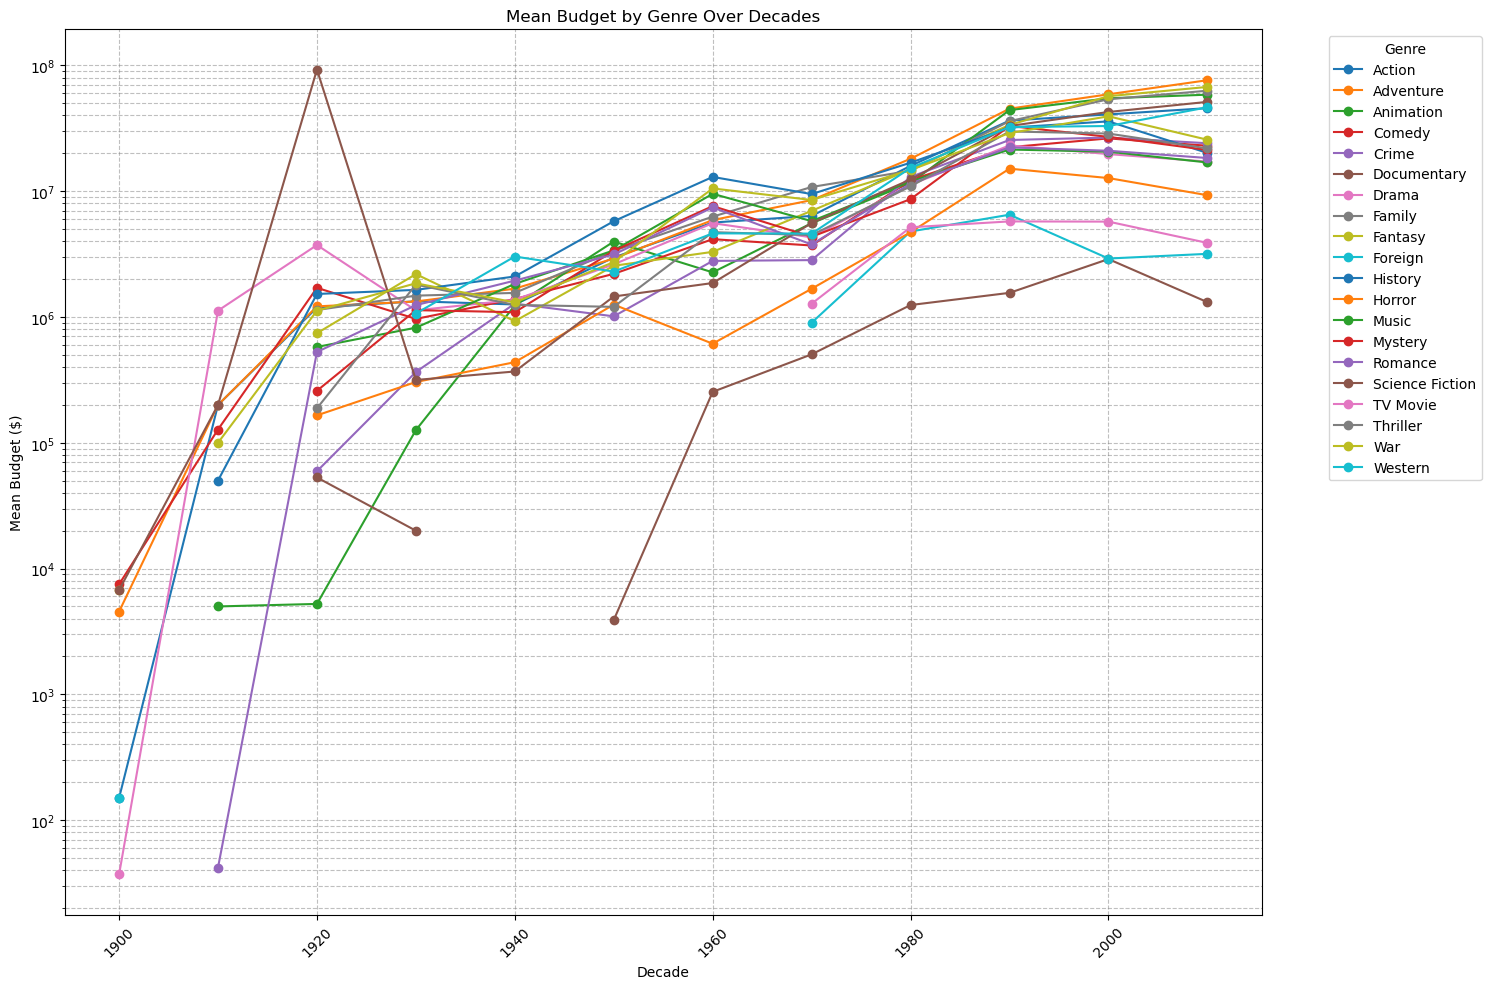

Genres, their mean budgets in 2010, and trend compared to 2000:
Adventure: $76,235,289.28 (Trend: +29.43%)
Fantasy: $67,404,854.53 (Trend: +18.46%)
Family: $62,906,632.17 (Trend: +16.95%)
Animation: $58,502,715.87 (Trend: +6.85%)
Science Fiction: $51,286,765.05 (Trend: +20.33%)
Western: $46,418,000.00 (Trend: +40.84%)
Action: $45,713,984.44 (Trend: +12.09%)
War: $25,651,357.56 (Trend: -34.86%)
Crime: $24,042,167.13 (Trend: -9.91%)
Comedy: $22,972,788.24 (Trend: -12.60%)
Thriller: $21,888,268.84 (Trend: -23.76%)
Mystery: $21,250,931.99 (Trend: -21.36%)
History: $20,136,973.75 (Trend: -43.88%)
Romance: $18,353,010.85 (Trend: -12.43%)
Drama: $17,190,003.11 (Trend: -12.82%)
Music: $16,915,072.77 (Trend: -17.93%)
Horror: $9,288,861.73 (Trend: -26.93%)
TV Movie: $3,880,000.00 (Trend: -32.27%)
Foreign: $3,176,498.70 (Trend: +8.98%)
Documentary: $1,311,786.72 (Trend: -54.54%)


In [65]:
# Import necessary libraries
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['movie_budget']  # Replace with your actual database name
collection = db['kaggle_movies_metadata_nested']  # Use the nested collection

# Fetch data for decades 1990, 2000, and 2010
pipeline = [
    {"$unwind": "$movies"},
    {"$unwind": "$movies.genres"},
    {"$group": {
        "_id": {
            "decade": {'$subtract': [{'$year': '$release_date'}, {'$mod': [{'$year': '$release_date'}, 10]}]},
            "genre": "$movies.genres.name"
        },
        'movie_count': {'$sum': 1},
        'total_budget': {'$sum': '$budget'}
    }},
    {'$sort': {'_id.genre': 1,'_id.decade': 1}}
]
# Execute the MongoDB aggregation pipeline
data = list(collection.aggregate(pipeline))

import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['movie_budget']  # Replace with your actual database name
collection = db['kaggle_movies_metadata_optimized_v1']

# Fetch and aggregate data from MongoDB
pipeline = [
    {'$match': {'budget': {'$gt': 0}, 'release_decade': {'$gt': 0}}},
    {'$unwind': '$genres'},
    {'$group': {
        '_id': {
            'genre': '$genres.name',
            'decade': '$release_decade'
        },
        'movie_count': {'$sum': 1},
        'total_budget': {'$sum': '$budget'}
    }},
    {'$sort': {'_id.genre': 1,'_id.decade': 1}},
]

cursor = collection.aggregate(pipeline)

# Convert cursor to array
data = list(cursor)

# Calculate mean budget for each genre-decade combination
for item in data:
    item['mean_budget'] = item['total_budget'] / item['movie_count']

# Create a dictionary to store the pivoted data
pivot_data = {}

# Pivot the data for plotting
for item in data:
    decade = item['_id']['decade']
    genre = item['_id']['genre']
    mean_budget = item['mean_budget']
    
    if decade not in pivot_data:
        pivot_data[decade] = {}
    pivot_data[decade][genre] = mean_budget

# Get unique decades and genres
decades = sorted(list(pivot_data.keys()))
genres = sorted(list(set(genre for decade_data in pivot_data.values() for genre in decade_data.keys())))

# Create a line plot
plt.figure(figsize=(15, 10))
for genre in genres:
    genre_data = [pivot_data[decade].get(genre, None) for decade in decades]
    plt.plot(decades, genre_data, marker='o', label=genre)

plt.title('Mean Budget by Genre Over Decades')
plt.xlabel('Decade')
plt.ylabel('Mean Budget ($)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')  # Use log scale for better visualization
plt.grid(True, which="both", ls="--", c='gray', alpha=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Filter data for the 2010 and 2000 decades
data_2010 = [item for item in data if item['_id']['decade'] == 2010]
data_2000 = [item for item in data if item['_id']['decade'] == 2000]

# Create dictionaries of genre to mean budget for 2010 and 2000
genre_budget_2010 = {item['_id']['genre']: item['mean_budget'] for item in data_2010}
genre_budget_2000 = {item['_id']['genre']: item['mean_budget'] for item in data_2000}

# Create a list of tuples containing genre, mean budget for 2010, and trend compared to 2000
genre_budget_trend = []
for genre, budget_2010 in genre_budget_2010.items():
    budget_2000 = genre_budget_2000.get(genre, 0)
    if budget_2000 > 0:
        trend = (budget_2010 - budget_2000) / budget_2000 * 100
    else:
        trend = float('inf') if budget_2010 > 0 else 0
    genre_budget_trend.append((genre, budget_2010, trend))

# Sort the list by mean budget in 2010 in descending order
genre_budget_trend.sort(key=lambda x: x[1], reverse=True)

# Print the list of genres, their mean budgets for 2010, and trend compared to 2000
print("Genres, their mean budgets in 2010, and trend compared to 2000:")
for genre, mean_budget, trend in genre_budget_trend:
    trend_str = f"{trend:+.2f}%" if trend != float('inf') else "N/A (new in 2010)"
    print(f"{genre}: ${mean_budget:,.2f} (Trend: {trend_str})")



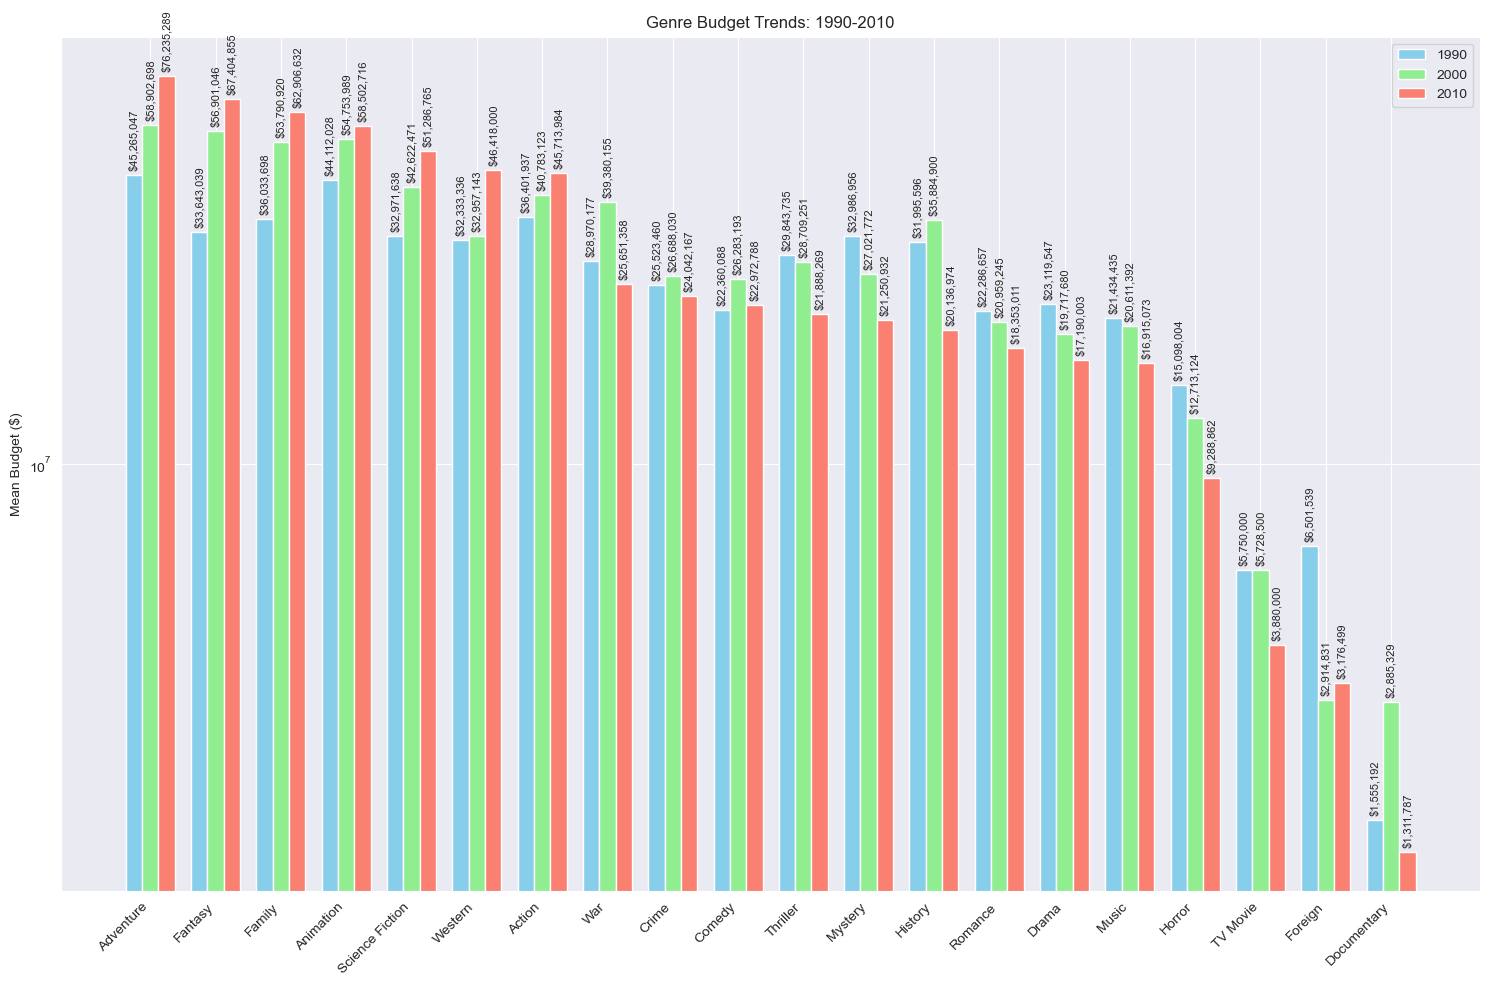


Summary of Genre Budget Trends from 1990 to 2010:
Adventure: +68.42%
Fantasy: +100.35%
Family: +74.58%
Animation: +32.62%
Science Fiction: +55.55%
Western: +43.56%
Action: +25.58%
War: -11.46%
Crime: -5.80%
Comedy: +2.74%
Thriller: -26.66%
Mystery: -35.58%
History: -37.06%
Romance: -17.65%
Drama: -25.65%
Music: -21.08%
Horror: -38.48%
TV Movie: -32.52%
Foreign: -51.14%
Documentary: -15.65%


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for the decades 1990, 2000, and 2010
decades = [1990, 2000, 2010]
filtered_data = [item for item in data if item['_id']['decade'] in decades]

# Create a dictionary to store genre budgets for each decade
genre_budgets = {}

for item in filtered_data:
    genre = item['_id']['genre']
    decade = item['_id']['decade']
    budget = item['mean_budget']
    
    if genre not in genre_budgets:
        genre_budgets[genre] = {1990: 0, 2000: 0, 2010: 0}
    
    genre_budgets[genre][decade] = budget

# Sort genres by their 2010 budget
sorted_genres = sorted(genre_budgets.keys(), key=lambda x: genre_budgets[x][2010], reverse=True)

# Prepare data for plotting
x = np.arange(len(sorted_genres))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 10))

# Plot bars for each decade
rects1 = ax.bar(x - width, [genre_budgets[genre][1990] for genre in sorted_genres], width, label='1990', color='skyblue')
rects2 = ax.bar(x, [genre_budgets[genre][2000] for genre in sorted_genres], width, label='2000', color='lightgreen')
rects3 = ax.bar(x + width, [genre_budgets[genre][2010] for genre in sorted_genres], width, label='2010', color='salmon')

# Customize the plot
ax.set_ylabel('Mean Budget ($)')
ax.set_title('Genre Budget Trends: 1990-2010')
ax.set_xticks(x)
ax.set_xticklabels(sorted_genres, rotation=45, ha='right')
ax.legend()

# Use log scale for y-axis
ax.set_yscale('log')

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'${height:,.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90, fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print a summary of the trends
print("\nSummary of Genre Budget Trends from 1990 to 2010:")
for genre in sorted_genres:
    budget_1990 = genre_budgets[genre][1990]
    budget_2010 = genre_budgets[genre][2010]
    if budget_1990 > 0:
        trend = (budget_2010 - budget_1990) / budget_1990 * 100
        trend_str = f"{trend:+.2f}%"
    else:
        trend_str = "N/A (new since 1990)"
    print(f"{genre}: {trend_str}")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



High Budget, Low Vote Average Movies:
Budget: $32,000,000, Vote Average: 5.3
Budget: $32,000,000, Vote Average: 5.2
Budget: $35,000,000, Vote Average: 4.6
Budget: $35,000,000, Vote Average: 5.3
Budget: $35,000,000, Vote Average: 5.1

Low Budget, High Vote Average Movies:
Budget: $1, Vote Average: 6.8
Budget: $1, Vote Average: 7.7
Budget: $1, Vote Average: 8.0
Budget: $2, Vote Average: 7.0
Budget: $2, Vote Average: 8.0


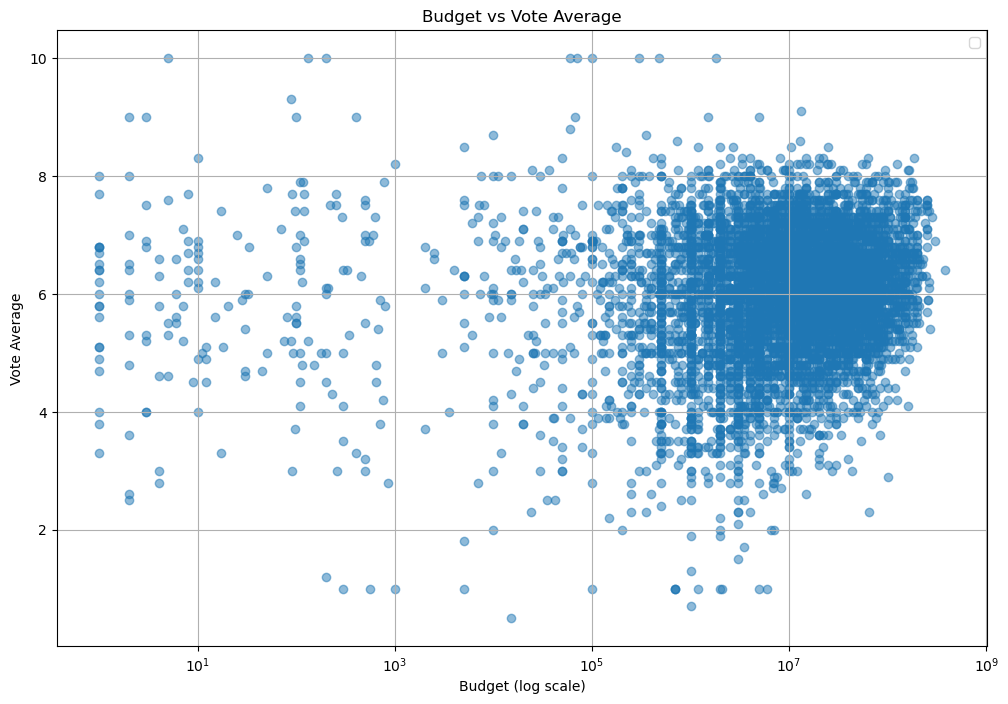

Pearson Correlation Analysis Results:
   Decade  Correlation       P-value
2    1990     0.021157  4.463077e-01
1    2000     0.123296  3.716375e-11
0    2010     0.154233  6.079166e-17


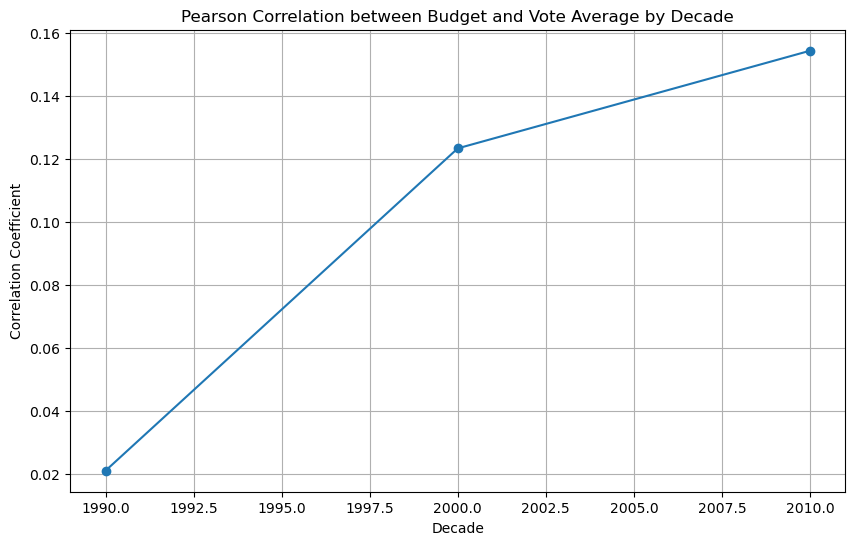


Interpretation:

Decade: 1990.0s
Correlation: 0.0212
P-value: 0.4463
There is no statistically significant correlation between budget and vote average.

Decade: 2000.0s
Correlation: 0.1233
P-value: 0.0000
There is a statistically significant weak positive correlation between budget and vote average.

Decade: 2010.0s
Correlation: 0.1542
P-value: 0.0000
There is a statistically significant weak positive correlation between budget and vote average.


In [53]:
# Import necessary libraries
from pymongo import MongoClient
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Fetch data from MongoDB
pipeline = [
    {
        '$project': {
            'budget': 1,
            'vote_average': 1,
            'release_decade': 1
        }
    },
    {
        '$match': {
            'budget': {'$gt': 0},
            'vote_average': {'$gt': 0},
            'release_decade': {'$in': [1990,2000,2010]}
        }
    },
    {
        '$group': {
            '_id': '$release_decade',
            'budgets': {'$push': '$budget'},
            'vote_averages': {'$push': '$vote_average'}
        }
    }
]

cursor = collection.aggregate(pipeline)
data = list(cursor)

# Prepare data for analysis
all_budgets = []
all_vote_averages = []

for decade_data in data:
    all_budgets.extend(decade_data['budgets'])
    all_vote_averages.extend(decade_data['vote_averages'])

# Convert to numpy arrays for easier manipulation
budgets = np.array(all_budgets)
vote_averages = np.array(all_vote_averages)

# Calculate percentiles for budget and vote average
budget_percentiles = np.percentile(budgets, [25, 75])
vote_percentiles = np.percentile(vote_averages, [25, 75])

# Find high budget with low vote average
high_budget_low_vote = np.where((budgets > budget_percentiles[1]) & (vote_averages < vote_percentiles[0]))[0]

# Find low budget with high vote average
low_budget_high_vote = np.where((budgets < budget_percentiles[0]) & (vote_averages > vote_percentiles[1]))[0]

# Display results
print("\nHigh Budget, Low Vote Average Movies:")
for idx in high_budget_low_vote[:5]:  # Show top 5 examples
    print(f"Budget: ${budgets[idx]:,.0f}, Vote Average: {vote_averages[idx]:.1f}")

print("\nLow Budget, High Vote Average Movies:")
for idx in low_budget_high_vote[:5]:  # Show top 5 examples
    print(f"Budget: ${budgets[idx]:,.0f}, Vote Average: {vote_averages[idx]:.1f}")

# Visualize the results
plt.figure(figsize=(12, 8))
plt.scatter(budgets, vote_averages, alpha=0.5)
# plt.scatter(budgets[high_budget_low_vote], vote_averages[high_budget_low_vote], color='red', label='High Budget, Low Vote')
# plt.scatter(budgets[low_budget_high_vote], vote_averages[low_budget_high_vote], color='green', label='Low Budget, High Vote')
plt.xscale('log')
plt.xlabel('Budget (log scale)')
plt.ylabel('Vote Average')
plt.title('Budget vs Vote Average')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for Pearson correlation analysis
decades = []
correlations = []
p_values = []

for decade_data in data:
    decade = decade_data['_id']
    budgets = decade_data['budgets']
    vote_averages = decade_data['vote_averages']
    
    # Calculate Pearson correlation
    correlation, p_value = stats.pearsonr(budgets, vote_averages)
    
    decades.append(decade)
    correlations.append(correlation)
    p_values.append(p_value)

# Create a DataFrame for easy visualization
correlation_df = pd.DataFrame({
    'Decade': decades,
    'Correlation': correlations,
    'P-value': p_values
})

# Sort by decade
correlation_df = correlation_df.sort_values('Decade')

# Display the results
print("Pearson Correlation Analysis Results:")
print(correlation_df)

# Visualize the correlation trends
plt.figure(figsize=(10, 6))
plt.plot(correlation_df['Decade'], correlation_df['Correlation'], marker='o')
plt.title('Pearson Correlation between Budget and Vote Average by Decade')
plt.xlabel('Decade')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

# Interpret the results
print("\nInterpretation:")
for _, row in correlation_df.iterrows():
    decade = row['Decade']
    correlation = row['Correlation']
    p_value = row['P-value']
    
    print(f"\nDecade: {decade}s")
    print(f"Correlation: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        strength = "weak" if abs(correlation) < 0.3 else "moderate" if abs(correlation) < 0.6 else "strong"
        direction = "positive" if correlation > 0 else "negative"
        print(f"There is a statistically significant {strength} {direction} correlation between budget and vote average.")
    else:
        print("There is no statistically significant correlation between budget and vote average.")



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



High Budget, Low Popularity Movies:
Budget: $31,000,000, Popularity: 1.9
Budget: $40,000,000, Popularity: 1.6
Budget: $40,000,000, Popularity: 1.3
Budget: $40,000,000, Popularity: 0.8
Budget: $58,000,000, Popularity: 0.4

Low Budget, High Popularity Movies:
Budget: $93, Popularity: 11.1
Budget: $100,000, Popularity: 24.3
Budget: $125,000, Popularity: 10.9
Budget: $500,000, Popularity: 15.0
Budget: $850,000, Popularity: 10.4


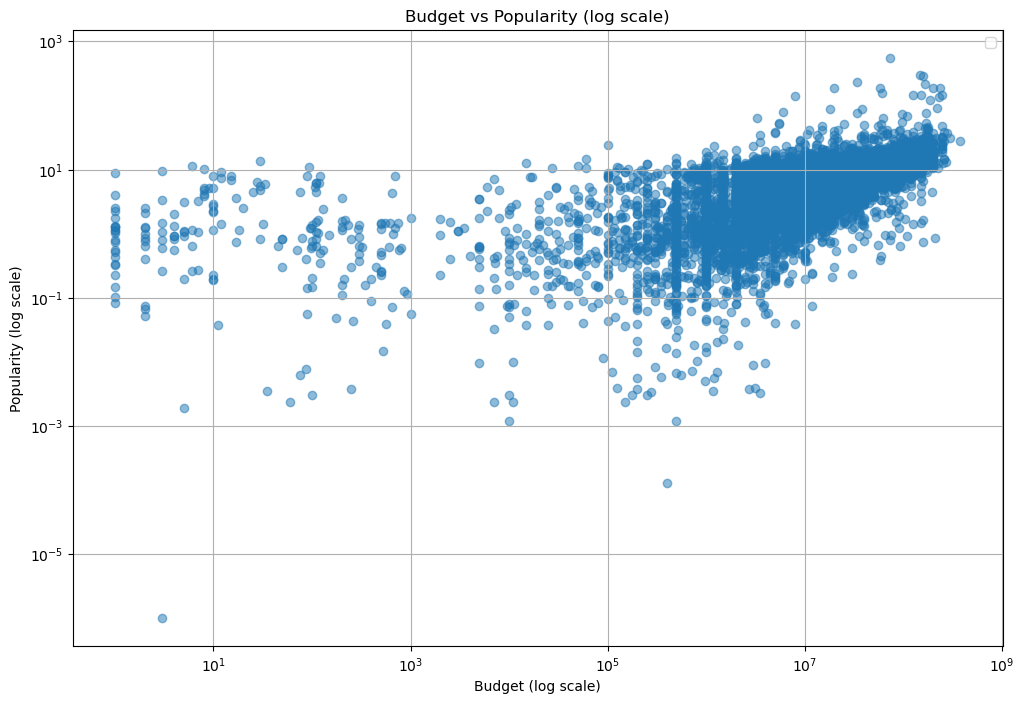

Pearson Correlation Analysis Results:
   Decade  Correlation        P-value
1    1990     0.347631   2.140833e-38
2    2000     0.529595  3.943463e-209
0    2010     0.360159   6.643744e-91


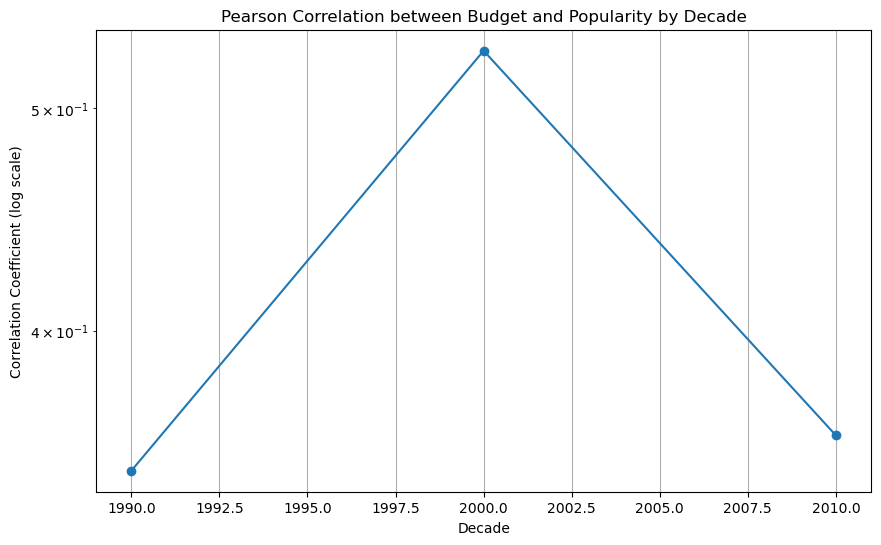


Interpretation:

Decade: 1990.0s
Correlation: 0.3476
P-value: 0.0000
There is a statistically significant moderate positive correlation between budget and popularity.

Decade: 2000.0s
Correlation: 0.5296
P-value: 0.0000
There is a statistically significant moderate positive correlation between budget and popularity.

Decade: 2010.0s
Correlation: 0.3602
P-value: 0.0000
There is a statistically significant moderate positive correlation between budget and popularity.


In [54]:
# Import necessary libraries
from pymongo import MongoClient
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Fetch data from MongoDB
pipeline = [
    {
        '$project': {
            'budget': 1,
            'popularity': 1,
            'release_decade': 1
        }
    },
    {
        '$match': {
            'budget': {'$gt': 0},
            'popularity': {'$gt': 0},
            'release_decade': {'$in': [1990,2000,2010]}
        }
    },
    {
        '$group': {
            '_id': '$release_decade',
            'budgets': {'$push': '$budget'},
            'popularities': {'$push': '$popularity'}
        }
    }
]

cursor = collection.aggregate(pipeline)
data = list(cursor)

# Prepare data for analysis
all_budgets = []
all_popularities = []

for decade_data in data:
    all_budgets.extend(decade_data['budgets'])
    all_popularities.extend(decade_data['popularities'])

# Convert to numpy arrays for easier manipulation
budgets = np.array(all_budgets)
popularities = np.array(all_popularities)

# Calculate percentiles for budget and popularity
budget_percentiles = np.percentile(budgets, [25, 75])
popularity_percentiles = np.percentile(popularities, [25, 75])

# Find high budget with low popularity
high_budget_low_popularity = np.where((budgets > budget_percentiles[1]) & (popularities < popularity_percentiles[0]))[0]

# Find low budget with high popularity
low_budget_high_popularity = np.where((budgets < budget_percentiles[0]) & (popularities > popularity_percentiles[1]))[0]

# Display results
print("\nHigh Budget, Low Popularity Movies:")
for idx in high_budget_low_popularity[:5]:  # Show top 5 examples
    print(f"Budget: ${budgets[idx]:,.0f}, Popularity: {popularities[idx]:.1f}")

print("\nLow Budget, High Popularity Movies:")
for idx in low_budget_high_popularity[:5]:  # Show top 5 examples
    print(f"Budget: ${budgets[idx]:,.0f}, Popularity: {popularities[idx]:.1f}")

# Visualize the results using log scale for both axes
plt.figure(figsize=(12, 8))
plt.scatter(budgets, popularities, alpha=0.5)
# plt.scatter(budgets[high_budget_low_popularity], popularities[high_budget_low_popularity], color='red', label='High Budget, Low Popularity')
# plt.scatter(budgets[low_budget_high_popularity], popularities[low_budget_high_popularity], color='green', label='Low Budget, High Popularity')
plt.xscale('log')
plt.yscale('log')  # Apply log scale to the y-axis as well
plt.xlabel('Budget (log scale)')
plt.ylabel('Popularity (log scale)')
plt.title('Budget vs Popularity (log scale)')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for Pearson correlation analysis
decades = []
correlations = []
p_values = []

for decade_data in data:
    decade = decade_data['_id']
    budgets = decade_data['budgets']
    popularities = decade_data['popularities']
    
    # Calculate Pearson correlation
    correlation, p_value = stats.pearsonr(budgets, popularities)
    
    decades.append(decade)
    correlations.append(correlation)
    p_values.append(p_value)

# Create a DataFrame for easy visualization
correlation_df = pd.DataFrame({
    'Decade': decades,
    'Correlation': correlations,
    'P-value': p_values
})

# Sort by decade
correlation_df = correlation_df.sort_values('Decade')

# Display the results
print("Pearson Correlation Analysis Results:")
print(correlation_df)

# Visualize the correlation trends with log scale
plt.figure(figsize=(10, 6))
plt.plot(correlation_df['Decade'], correlation_df['Correlation'], marker='o')
plt.yscale('log')  # Apply log scale to the y-axis
plt.title('Pearson Correlation between Budget and Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Correlation Coefficient (log scale)')
plt.grid(True)
plt.show()

# Interpret the results
print("\nInterpretation:")
for _, row in correlation_df.iterrows():
    decade = row['Decade']
    correlation = row['Correlation']
    p_value = row['P-value']
    
    print(f"\nDecade: {decade}s")
    print(f"Correlation: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        strength = "weak" if abs(correlation) < 0.3 else "moderate" if abs(correlation) < 0.6 else "strong"
        direction = "positive" if correlation > 0 else "negative"
        print(f"There is a statistically significant {strength} {direction} correlation between budget and popularity.")
    else:
        print("There is no statistically significant correlation between budget and popularity.")
